In [360]:
import numpy as np
from numpy.typing import NDArray
from tqdm import tqdm
import time

import torch
import torch.nn as nn  
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

f(x) = a*x + b

In [361]:
def f(x):
    return x*x


def gd_f(x):
    return 2*x

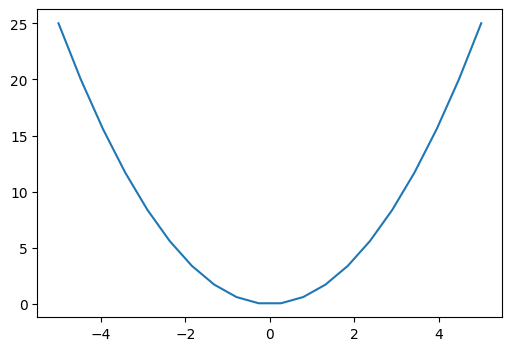

In [362]:
D = 5

X = np.linspace(-D, D, 20)
y = f(X)

plt.figure(figsize=(6, 4))  
plt.plot(X, y)

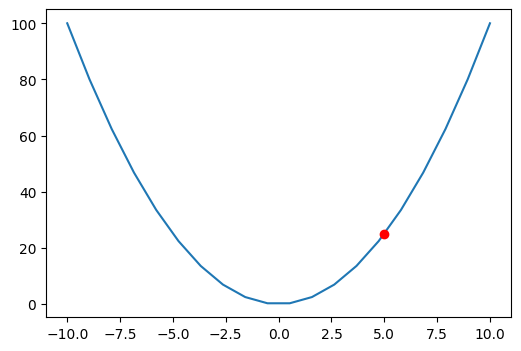

In [363]:
D = 10
start = 5

X = np.linspace(-D, D, 20)
y = f(X)

plt.figure(figsize=(6, 4))
plt.plot(X, y)
plt.plot(start, f(start), marker='o', c="red")
plt.show()

In [364]:
grad = gd_f(start)
grad

10

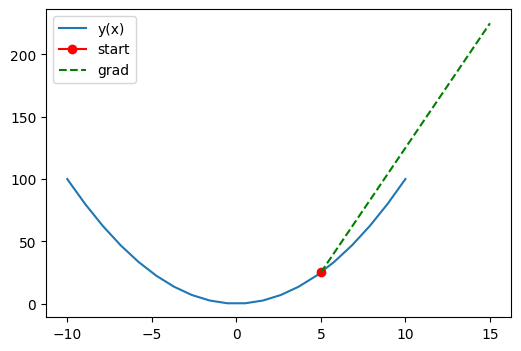

In [365]:
plt.figure(figsize=(6, 4))
plt.plot(X, y, label="y(x)")
plt.plot(start, f(start), marker='o', c="red", label="start")

next_point = start + grad

plt.plot([start, next_point], f(np.array([start, next_point])), '--g', label="grad")
plt.legend()
plt.show()

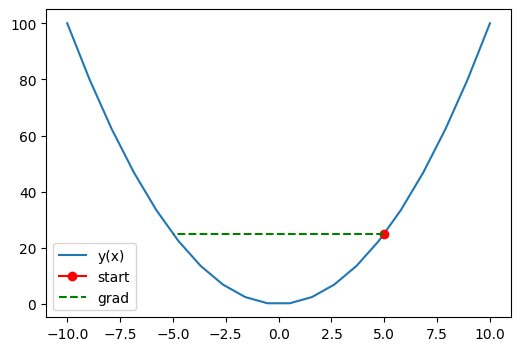

In [366]:
plt.figure(figsize=(6, 4))
plt.plot(X, y, label="y(x)")
plt.plot(start, f(start), marker='o', c="red", label="start")

next_point = start - grad

plt.plot([start, next_point], f(np.array([start, next_point])), '--g', label="grad")
plt.legend()
plt.show()

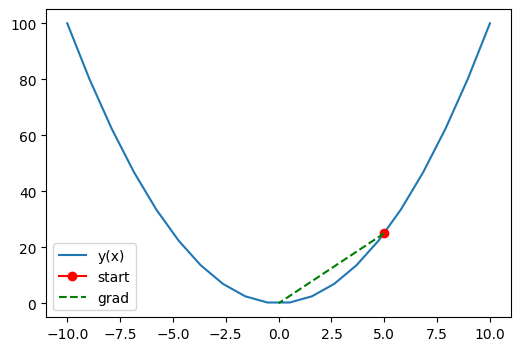

In [367]:
learning_rate = 0.5

plt.figure(figsize=(6, 4))
plt.plot(X, y, label="y(x)")
plt.plot(start, f(start), marker='o', c="red", label="start")

next_point = start - grad * learning_rate

plt.plot([start, next_point], f(np.array([start, next_point])), '--g', label="grad")
plt.legend()
plt.show()

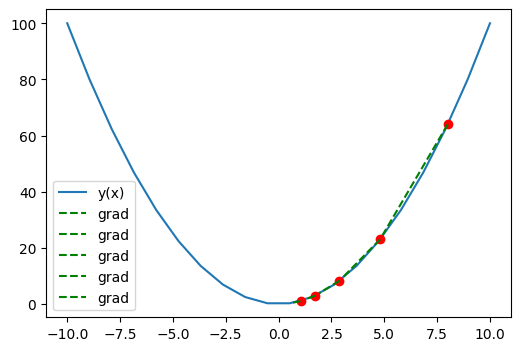

In [368]:
learning_rate = 0.2
start = 8
iters = 5

plt.figure(figsize=(6, 4))
plt.plot(X, y, label="y(x)")
for _ in range(iters):
    plt.plot(start, f(start), marker='o', c="red")
    grad = gd_f(start)
    next_point = start - grad*learning_rate
    plt.plot([start, next_point], f(np.array([start, next_point])), '--g', label="grad")

    start = next_point 

plt.legend()
plt.show()

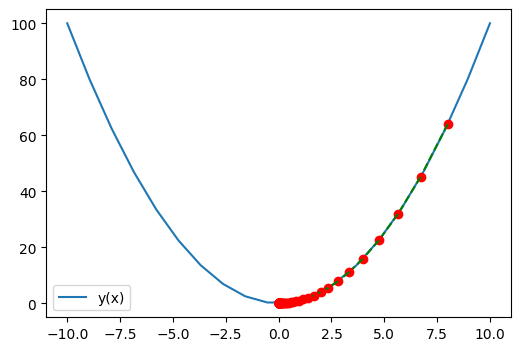

In [369]:
learning_rate = 0.08
start = 8
iters = 100

plt.figure(figsize=(6, 4))
plt.plot(X, y, label="y(x)")
for _ in range(iters):
    plt.plot(start, f(start), marker='o', c="red")
    grad = gd_f(start)
    next_point = start - grad*learning_rate
    plt.plot([start, next_point], f(np.array([start, next_point])), '--g')

    start = next_point

plt.legend()
plt.show()

```math
f(x, y) = x^4 - (x + y)^2 + y^4
```
```math
(-1, -1);
(0, 0);
(1, 1);
```

In [370]:
def func(x, y):
    return x**4 - (x+y)**2 + y**4


def func_gradient(x, y):
    df_dx = 4*x**3 - 2*(x + y)
    df_dy = -2*(x + y) + 4*y**3
    return df_dx, df_dy

In [371]:
func_gradient(0, 0), func_gradient(1, 1), func_gradient(-1, -1)

((0, 0), (0, 0), (0, 0))

In [372]:
def criteria_for_stopping(weights, eps, epoch) -> bool:
    if abs(weights[0]-0) < eps and abs(weights[1]-0) < eps:
        print(f"Сошлось на {epoch} эпохе. Веса: {weights[0]:.5f}, {weights[1]:.5f}")
        return True
    if abs(weights[0]-1) < eps and abs(weights[1]-1) < eps:
        print(f"Сошлось на {epoch} эпохе. Веса: {weights[0]:.5f}, {weights[1]:.5f}")
        return True
    if abs(weights[0]+1) < eps and abs(weights[1]+1) < eps:
        print(f"Сошлось на {epoch} эпохе. Веса: {weights[0]:.5f}, {weights[1]:.5f}")
        return True
    return False

In [373]:
epochs = 10000
lr = 0.001
eps = 1e-4

start = [-3.2, 11.3]

trajectory = [start.copy()]
values = [func(start[0], start[1])]

current = start.copy()
for e in range(epochs):
    grad = func_gradient(current[0], current[1])
    
    next_point = [current[0] - grad[0] * lr, current[1] - grad[1] * lr]
    
    trajectory.append(next_point.copy())
    values.append(func(next_point[0], next_point[1]))
    current = next_point
    
    if criteria_for_stopping(weights=current, eps=eps, epoch=e):
        break

Сошлось на 3086 эпохе. Веса: 0.99990, 0.99990


In [374]:
func_gradient(*current)

(-0.000800909956071294, -0.0007860750285719753)

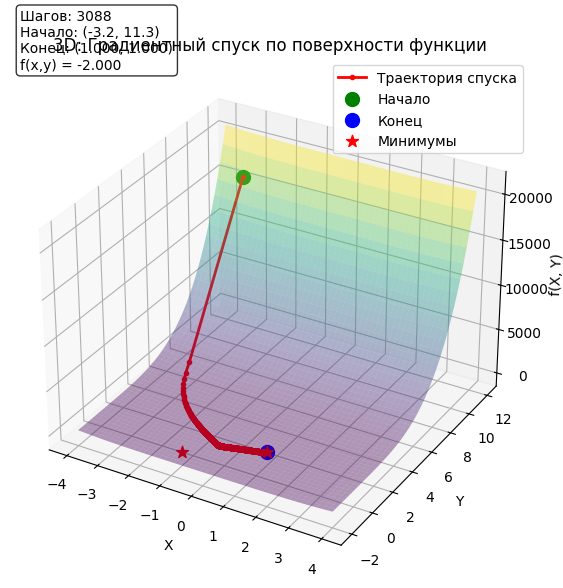

In [375]:
trajectory = np.array(trajectory)
values = np.array(values)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

x_surf = np.linspace(-4, 4, 50)
y_surf = np.linspace(-2, 12, 50)
X, Y = np.meshgrid(x_surf, y_surf)
Z = func(X, Y)

surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.4, linewidth=0, antialiased=True, zorder=1)
ax.plot(trajectory[:, 0], trajectory[:, 1], values, 'ro-', linewidth=2, markersize=3, label='Траектория спуска', zorder=5)
ax.scatter(trajectory[0, 0], trajectory[0, 1], values[0], color='green', s=100, label='Начало', zorder=10)
ax.scatter(trajectory[-1, 0], trajectory[-1, 1], values[-1], color='blue', s=100, label='Конец', zorder=10)

minima_points = [(1, 1), (-1, -1)]
for x_min, y_min in minima_points:
    z_min = func(x_min, y_min)
    ax.scatter(x_min, y_min, z_min, color='red', s=80, marker='*', 
              label='Минимумы', zorder=10)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(X, Y)')
ax.set_title('3D: Градиентный спуск по поверхности функции')
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())
info_text = f'Шагов: {len(trajectory)}\nНачало: ({start[0]}, {start[1]})\nКонец: ({trajectory[-1,0]:.3f}, {trajectory[-1,1]:.3f})\nf(x,y) = {values[-1]:.3f}'
ax.text2D(0.02, 0.98, info_text, transform=ax.transAxes, bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

In [376]:
def func_gradient_torch(x, y):
    df_dx = 4*x**3 - 2*(x + y)
    df_dy = -2*(x + y) + 4*y**3
    return torch.tensor([[df_dx], [df_dy]], requires_grad=True)

In [377]:
epochs = 1000
eps = 1e-3

w = torch.tensor([[-0.2], [1.3]], requires_grad=True)

optimizer = torch.optim.SGD([w], lr=lr)

losses = []
for e in range(epochs):
    optimizer.zero_grad()
    loss = func(w[0], w[1])
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
w.data

tensor([[0.9965],
        [0.9969]])

In [378]:
func_gradient(*w.data)

(tensor([-0.0286]), tensor([-0.0237]))

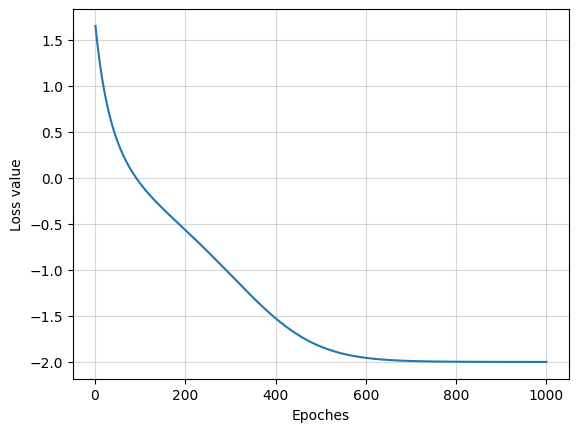

In [379]:
plt.plot([i for i in range(1, len(losses)+1)], losses)
plt.grid(alpha=0.5)
plt.ylabel("Loss value")
plt.xlabel("Epoches")
plt.show()

# Регрессия

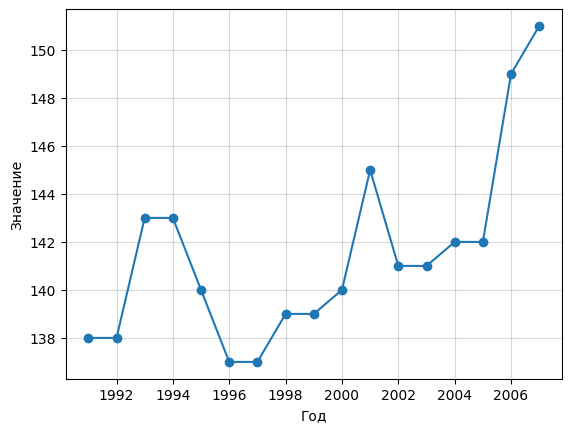

In [380]:
X = torch.tensor([[1991],[1992], [1993], [1994], [1995], [1996], [1997], [1998], 
                  [1999], [2000], [2001], [2002], [2003], [2004], [2005],[2006],[2007]], 
                 dtype=torch.float32)
y = torch.tensor([[138],[138],[143],[143],[140],[137],[137],[139],
                  [139],[140],[145],[141],[141],[142],[142],[149],[151]], 
                 dtype=torch.float32)

plt.plot(X.numpy(), y.numpy(), 'o-')
plt.grid(alpha=0.5)
plt.xlabel('Год')
plt.ylabel('Значение')
plt.show()

```math
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2

In [381]:
def mse(X, w1, w0, y):
    X_np = X.numpy()[:, 0]
    y_np = y.numpy()[:, 0]
    pred = w1 * X_np + w0
    return np.sum((y_np - pred)**2) / len(pred)

def mse_grad(X, w1, w0, y):
    X_np = X.numpy()[:, 0]
    y_np = y.numpy()[:, 0]
    pred = w1 * X_np + w0  
    error = y_np - pred
    
    # Правильные производные:
    grad_w0 = -2/len(X) * np.sum(error)  
    grad_w1 = -2/len(X) * np.sum(error * X_np) 
    
    return np.array([grad_w0, grad_w1])

Эпоха 1, MSE: 20028.41
Эпоха 2, MSE: 819.91
Эпоха 3, MSE: 45.45
Эпоха 4, MSE: 14.23
Эпоха 5, MSE: 12.97
Эпоха 6, MSE: 12.92
Эпоха 7, MSE: 12.91
Эпоха 8, MSE: 12.91
Эпоха 9, MSE: 12.91
Эпоха 10, MSE: 12.91
Эпоха 11, MSE: 12.91
Эпоха 12, MSE: 12.91
Эпоха 13, MSE: 12.91
Эпоха 14, MSE: 12.91
Эпоха 15, MSE: 12.91
Эпоха 16, MSE: 12.91
Эпоха 17, MSE: 12.91
Эпоха 18, MSE: 12.91
Эпоха 19, MSE: 12.91
Эпоха 20, MSE: 12.91
Эпоха 21, MSE: 12.91
Эпоха 22, MSE: 12.91
Эпоха 23, MSE: 12.91
Эпоха 24, MSE: 12.91
Эпоха 25, MSE: 12.91
Эпоха 26, MSE: 12.91
Эпоха 27, MSE: 12.91
Эпоха 28, MSE: 12.91
Эпоха 29, MSE: 12.91
Эпоха 30, MSE: 12.91
Эпоха 31, MSE: 12.91
Эпоха 32, MSE: 12.91
Эпоха 33, MSE: 12.91
Эпоха 34, MSE: 12.91
Эпоха 35, MSE: 12.91
Эпоха 36, MSE: 12.91
Эпоха 37, MSE: 12.91
Эпоха 38, MSE: 12.91
Эпоха 39, MSE: 12.91
Эпоха 40, MSE: 12.91
Эпоха 41, MSE: 12.91
Эпоха 42, MSE: 12.91
Эпоха 43, MSE: 12.91
Эпоха 44, MSE: 12.91
Эпоха 45, MSE: 12.91
Эпоха 46, MSE: 12.91
Эпоха 47, MSE: 12.91
Эпоха 48, MSE: 12.

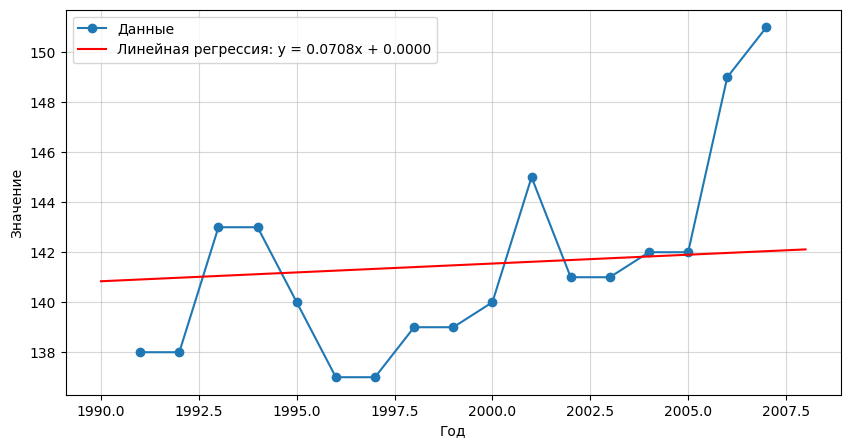

In [382]:
epochs = 100
learning_rate = 1e-7
w0 = 0.0
w1 = 0.0

for i in range(epochs):
    current_w0 = w0
    current_w1 = w1
    
    grad = mse_grad(X, current_w1, current_w0, y)
    
    w0 = current_w0 - learning_rate * grad[0]
    w1 = current_w1 - learning_rate * grad[1]
    
    print(f"Эпоха {i+1}, MSE: {mse(X, current_w1, current_w0, y):.2f}")

print(f"\nФинальные параметры: w1 = {w1:.4f}, w0 = {w0:.4f}")

# Визуализация результата
plt.figure(figsize=(10, 5))
plt.plot(X.numpy(), y.numpy(), 'o-', label='Данные')
X_line = torch.linspace(1990, 2008, 100).unsqueeze(1)
y_pred = w1 * X_line.numpy()[:, 0] + w0
plt.plot(X_line.numpy(), y_pred, 'r-', label=f'Линейная регрессия: y = {w1:.4f}x + {w0:.4f}')
plt.grid(alpha=0.5)
plt.xlabel('Год')
plt.ylabel('Значение')
plt.legend()
plt.show()

In [383]:
[i[0].item() for i in y]

[138.0,
 138.0,
 143.0,
 143.0,
 140.0,
 137.0,
 137.0,
 139.0,
 139.0,
 140.0,
 145.0,
 141.0,
 141.0,
 142.0,
 142.0,
 149.0,
 151.0]

In [384]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X = scaler.fit_transform(X.numpy())

In [385]:
X = torch.tensor([[1991],[1992], [1993], [1994], [1995], [1996], [1997], [1998], 
                  [1999], [2000], [2001], [2002], [2003], [2004], [2005],[2006],[2007]], dtype=torch.float32)
X_mean = X.mean()
X_std = X.std()
X_norm = (X - X_mean) / X_std

y = torch.tensor([[138],[138],[143],[143],[140],[137],[137],[139],
                  [139],[140],[145],[141],[141],[142],[142],[149],[151]], dtype=torch.float32)


w = torch.tensor([[0.0], [0.0]], requires_grad=True)
lr = 0.3
epochs = 6
optimizer = torch.optim.SGD([w], lr=lr)
loss_fn = nn.MSELoss()

losses = []

X_with_bias = torch.cat([torch.ones_like(X_norm), X_norm], dim=1)

for e in range(epochs):
    optimizer.zero_grad()

    y_pred = X_with_bias @ w  # y_pred = w0 + w1 * X
    loss = loss_fn(y_pred, y)
    loss.backward()
    optimizer.step()
    
    losses.append(loss.item())

    print(f"Эпоха {e+1}, MSE: {loss.item():.2f}")

Эпоха 1, MSE: 20028.41
Эпоха 2, MSE: 3211.90
Эпоха 3, MSE: 521.11
Эпоха 4, MSE: 90.56
Эпоха 5, MSE: 21.67
Эпоха 6, MSE: 10.64


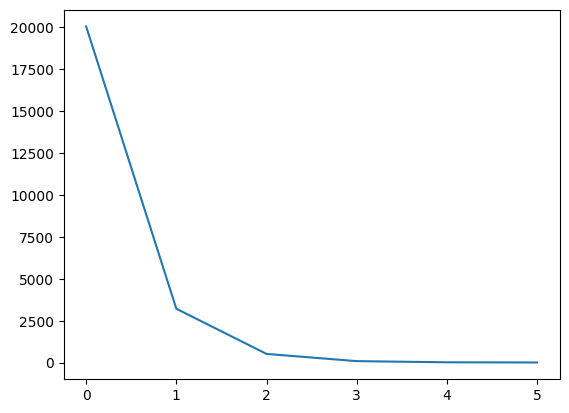

In [386]:
plt.plot(
    [i for i in range(len(losses))],
    losses
)

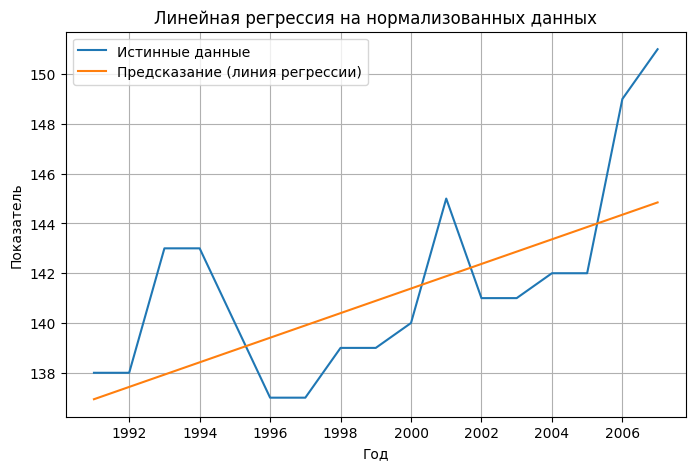

In [388]:
with torch.no_grad():
    y_pred = X_with_bias @ w

plt.figure(figsize=(8,5))
plt.plot(X, y, label='Истинные данные')
plt.plot(X, y_pred, label='Предсказание (линия регрессии)')
plt.title("Линейная регрессия на нормализованных данных")
plt.xlabel("Год")
plt.ylabel("Показатель")
plt.legend()
plt.grid(True)
plt.show()